# 1. Importación de paquetes

In [1]:
# Para la lectura y transformación de datos
import pandas as pd

# Para el manejo de vectores
import numpy as np

# Para importar modelos
import pickle

# Para la visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para realizar validación cruzada repetida
from sklearn.model_selection import RepeatedKFold

# Para obtener el score de la validación cruzada repetida
from sklearn.model_selection import cross_val_score

# Para evaluar las predicciones
from sklearn.metrics import roc_auc_score

# 2. Lectura de los datasets procedentes del Notebook 3

In [2]:
df_train = pd.read_csv(r'../Dataset_con_transformaciones/df_train_after_notebook3.csv')
df_test = pd.read_csv(r'../Dataset_con_transformaciones/df_test_after_notebook3.csv')

Dividir los conjuntos de train y test en:
- Variables input 
- Variable objetivo

In [3]:
X_train, y_train = df_train.drop(columns=['output']), df_train.output
X_test, y_test = df_test.drop(columns=['output']), df_test.output

# 3. Evaluación de modelos

In [4]:
models = []

models.append(('Redes neuronales', pickle.load(open('../Modelos/redes_neuronales_model.sav', 'rb'))))
models.append(('Regresión logística', pickle.load(open('../Modelos/logistic_regression_model.sav', 'rb'))))
models.append(('Árbol de decisión', pickle.load(open('../Modelos/decision_tree_classifier_model.sav', 'rb'))))
models.append(('Bagging', pickle.load(open('../Modelos/bagging_model.sav', 'rb'))))
models.append(('Random Forest', pickle.load(open('../Modelos/random_forest_model.sav', 'rb'))))
models.append(('Gradient Boosting', pickle.load(open('../Modelos/gradient_boosting_model.sav', 'rb'))))
models.append(('Support Vector Machines', pickle.load(open('../Modelos/support_vector_machines_model.sav', 'rb'))))
models.append(('Ensamblado', pickle.load(open('../Modelos/stacking_model.sav', 'rb'))))
models.append(('XGBoost', pickle.load(open('../Modelos/xgboost_model.sav', 'rb'))))

In [5]:
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=99) # Validación cruzada repetida

In [6]:
results = []
predictions = []
names = []

for model_name, model in models:
    auroc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    
    y_pred = model.predict(X_test)
    pred_auroc = roc_auc_score(y_test, y_pred)
    
    results.append(auroc)
    predictions.append(pred_auroc)
    names.append(model_name)

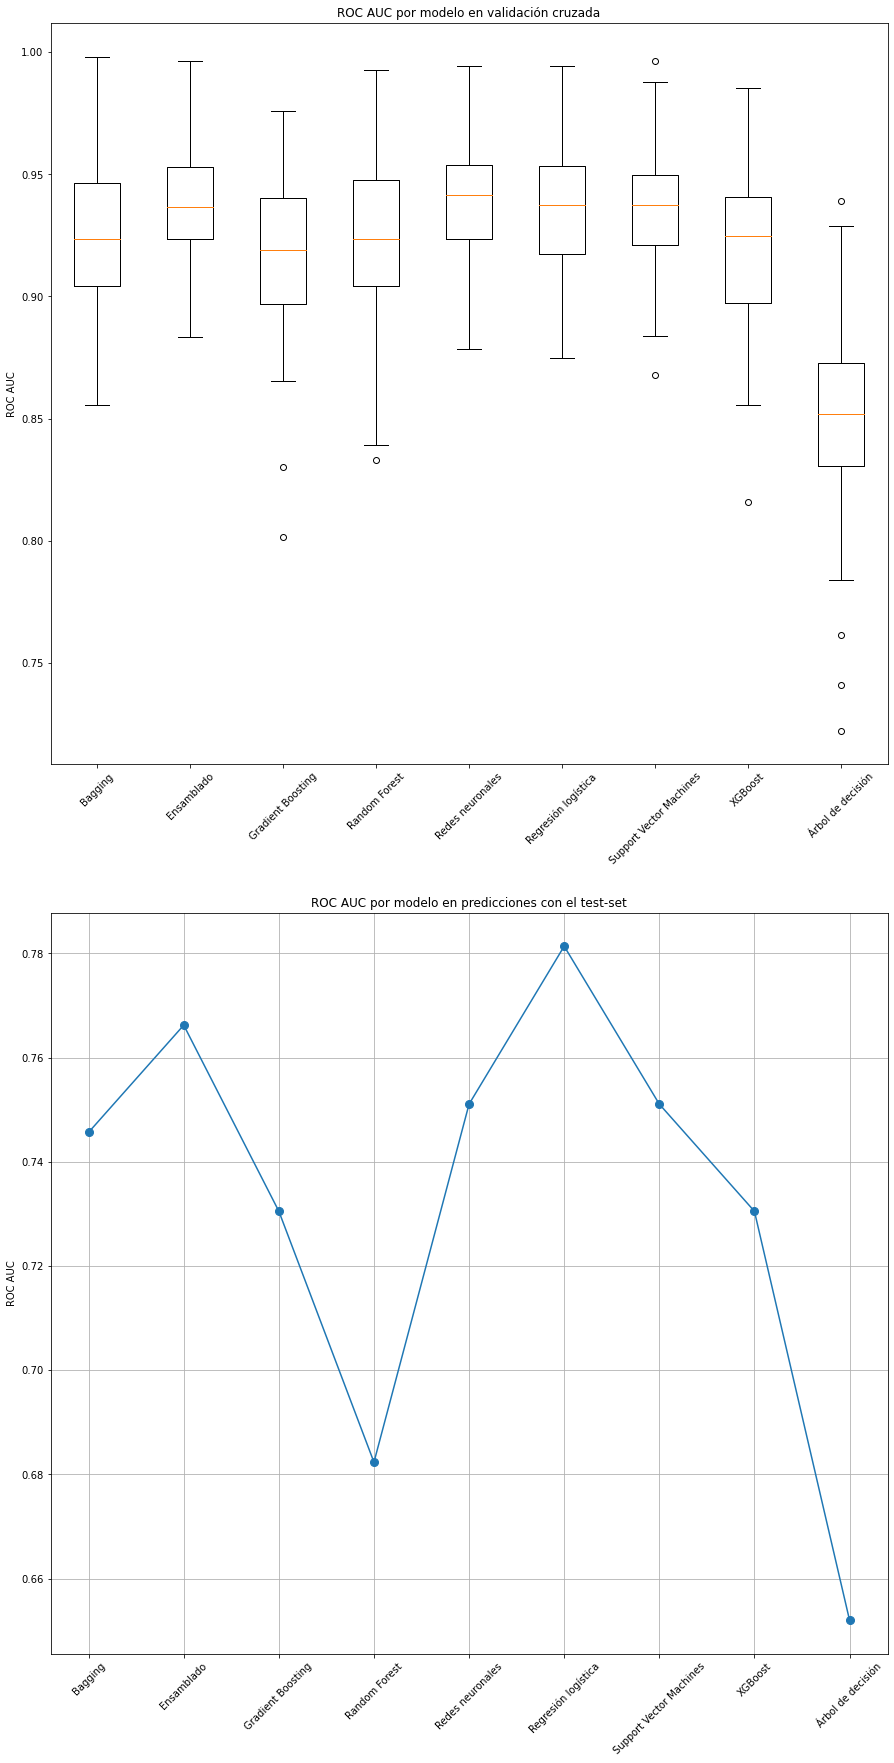

In [7]:
repeated_names = np.repeat(names, 50) 
results_flatten = [item for r in results for item in r]
results_df = pd.DataFrame(list(zip(repeated_names, results_flatten)), columns=['model', 'roc_auc'])

plt.figure(figsize=(15, 30))

plt.subplot(2, 1, 1)
grouped_data = results_df.groupby('model')['roc_auc'].apply(list)
boxplot_order = grouped_data.index 
plt.boxplot(grouped_data.values)
plt.xticks(range(1, len(grouped_data) + 1), boxplot_order, rotation=45)
plt.ylabel('ROC AUC')
plt.title('ROC AUC por modelo en validación cruzada')

plt.subplot(2, 1, 2)
predictions_df = pd.DataFrame(list(zip(names, predictions)), columns=['model', 'roc_auc']).sort_values('model')
plt.plot(predictions_df.model, predictions_df.roc_auc, marker='o', markersize=8)
plt.ylabel('ROC AUC')
plt.title('ROC AUC por modelo en predicciones con el test-set')
plt.xticks(boxplot_order, rotation=45)
plt.grid(True)

plt.show()